In [1]:
import astropy.io.fits as pf
import pylab as mplot
%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
shearcat = pf.open('mcal_test_v1.fits')[1].data

In [3]:
pf.open('mcal_test_v1.fits')[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  108 / length of dimension 1                          
NAXIS2  =              4809557 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   26 / number of table fields                         
TTYPE1  = 'COADD_OBJECT_ID'                                                     
TFORM1  = 'K       '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'DEC     '        

In [4]:
# read files
ra = shearcat['ra']
dec = shearcat['dec']

mask0 = (~((shearcat['TT']>2)*(shearcat['SN']<30)))*(shearcat['TT']<10)*(shearcat['SN']<1000)*(shearcat['SN']>10)*(shearcat['TR']>0.5)
mask_1p = (~((shearcat['TT_1p']>2)*(shearcat['SN_1p']<30)))*(shearcat['TT_1p']<10)*(shearcat['SN_1p']<1000)*(shearcat['SN_1p']>10)*(shearcat['TR_1p']>0.5)
mask_1m = (~((shearcat['TT_1m']>2)*(shearcat['SN_1m']<30)))*(shearcat['TT_1m']<10)*(shearcat['SN_1m']<1000)*(shearcat['SN_1m']>10)*(shearcat['TR_1m']>0.5)
mask_2p = (~((shearcat['TT_2p']>2)*(shearcat['SN_2p']<30)))*(shearcat['TT_2p']<10)*(shearcat['SN_2p']<1000)*(shearcat['SN_2p']>10)*(shearcat['TR_2p']>0.5)
mask_2m = (~((shearcat['TT_2m']>2)*(shearcat['SN_2m']<30)))*(shearcat['TT_2m']<10)*(shearcat['SN_2m']<1000)*(shearcat['SN_2m']>10)*(shearcat['TR_2m']>0.5)



# calcualte metacalibration factors
dgamma = 2*0.01

R11  = (np.mean(shearcat['E1_1p'][mask0]) - np.mean(shearcat['E1_1m'][mask0]))/dgamma
R11s = (np.mean(shearcat['E1'][mask_1p]) - np.mean(shearcat['E1'][mask_1m]))/dgamma
R11tot = R11 + R11s
print('R11_g', R11, 'R11_s', R11s)
print('R11 tot', R11tot)

R22  = (np.mean(shearcat['E2_2p'][mask0]) - np.mean(shearcat['E2_2m'][mask0]))/dgamma
R22s = (np.mean(shearcat['E2'][mask_2p]) - np.mean(shearcat['E2'][mask_2m]))/dgamma
R22tot = R22 + R22s
print('R22_g', R22, 'R22_s', R22s)
print('R22 tot', R22tot)

R11_g 0.6947742775082588 R11_s 0.010354770347476006
R11 tot 0.7051290478557348
R22_g 0.6846473552286625 R22_s 0.02245547657366842
R22 tot 0.7071028318023309


In [5]:
np.savez('metacal_sample_ID.npz', id=shearcat['COADD_OBJECT_ID'][mask0])
print(len(shearcat['COADD_OBJECT_ID'][mask0]))

2302721


Text(0, 0.5, 'e1')

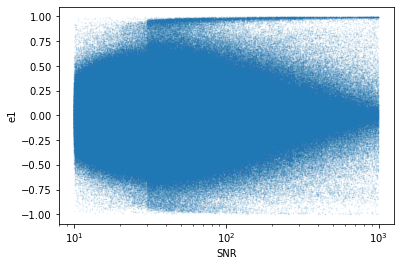

In [12]:
e1 = shearcat['E1'][mask0]
snr = shearcat['SN'][mask0]
size = shearcat['TR'][mask0]
e1_err = shearcat['E1err'][mask0]
e2 = shearcat['E2'][mask0]
e2_err = shearcat['E2err'][mask0]

mplot.scatter(snr, e1, marker='.', s=1, alpha=0.1)
mplot.xscale('log')
mplot.xlabel('SNR')
mplot.ylabel('e1')

Text(0, 0.5, 'e1')

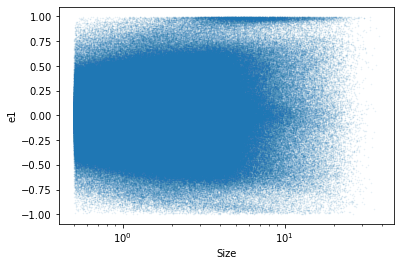

In [7]:
mplot.scatter(size, e1, marker='.', s=1, alpha=0.1)
mplot.xscale('log')
mplot.xlabel('Size')
mplot.ylabel('e1')

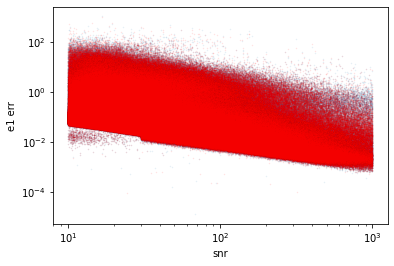

In [15]:
mplot.scatter(snr, e1_err**0.5, marker='.', s=1, alpha=0.1)
mplot.scatter(snr, e2_err**0.5, marker='.', s=1, alpha=0.1, c='r')

mplot.xlabel('snr')
mplot.ylabel('e1 err')
mplot.yscale('log')
mplot.xscale('log')

Text(0, 0.5, 'e1')

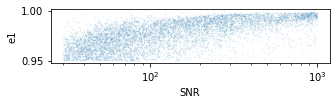

In [17]:
mplot.figure(figsize=(5,1))
bad_e1_mask = np.where((e1>0.95)*(snr>30))
mplot.scatter(snr[bad_e1_mask], e1[bad_e1_mask], marker='.', s=1, alpha=0.1)
mplot.xscale('log')
mplot.xlabel('SNR')
mplot.ylabel('e1')

In [63]:
np.savez('bad_e1_ids.npz', ids=shearcat['COADD_OBJECT_ID'][mask0][bad_e1_mask])
print(len(shearcat['COADD_OBJECT_ID'][mask0][bad_e1_mask]))
print(len(shearcat['COADD_OBJECT_ID'][mask0]))
print(len(shearcat['COADD_OBJECT_ID'][mask0])/(307*0.73*0.73*60*60))


7730
2302721
3.9098016459763363


0.008519719 0.3778085
-0.00049183884 0.3629658


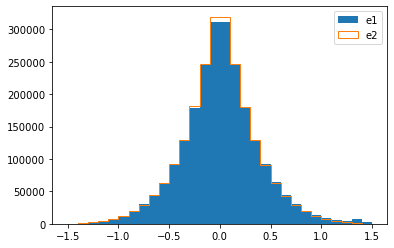

In [49]:
mplot.hist(shearcat['E1'][mask0]/R11tot, range=(-1.5,1.5), bins=30, label='e1')
mplot.hist(shearcat['E2'][mask0]/R22tot, range=(-1.5,1.5), bins=30, label='e2', histtype='step')
mplot.legend()

print(np.mean(shearcat['E1'][mask0]/R11tot), np.std(shearcat['E1'][mask0]/R11tot))
print(np.mean(shearcat['E2'][mask0]/R22tot), np.std(shearcat['E2'][mask0]/R22tot))


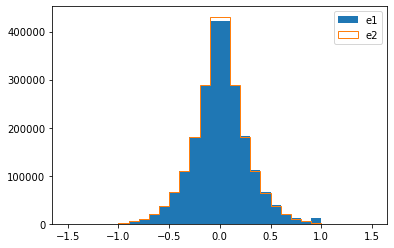

In [50]:
mplot.hist(shearcat['E1'][mask0], range=(-1.5,1.5), bins=30, label='e1')
mplot.hist(shearcat['E2'][mask0], range=(-1.5,1.5), bins=30, label='e2', histtype='step')
mplot.legend()



(array([ 172., 1530., 3192., 2602., 1691., 1068.,  605.,  423.,  343.,
         222.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
       dtype=float32),
 <BarContainer object of 10 artists>)

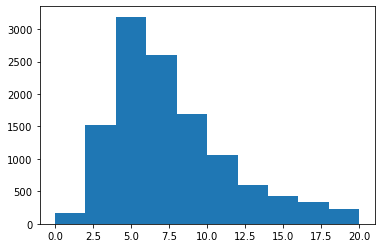

In [98]:
select = (shearcat['E1'][mask0]/R11tot>1.37)

mplot.hist(shearcat['TR'][mask0][select], range=(0,20))

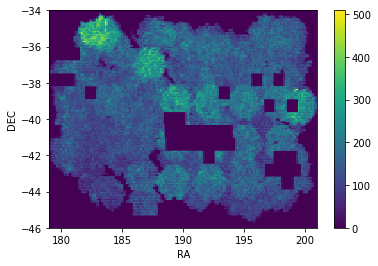

In [22]:
mplot.hist2d(ra[mask0], dec[mask0], range=((179, 201), (-46,-34)), bins=(150,150))
mplot.xlabel('RA')
mplot.ylabel('DEC')
mplot.colorbar()

In [47]:
len(ra[mask0])

2423692

In [25]:
help(treecorr.Catalog)

Help on class Catalog in module treecorr.catalog:

class Catalog(builtins.object)
 |  Catalog(file_name=None, config=None, num=0, logger=None, is_rand=False, x=None, y=None, z=None, ra=None, dec=None, r=None, w=None, wpos=None, flag=None, g1=None, g2=None, k=None, patch=None, patch_centers=None, rng=None, **kwargs)
 |  
 |  A set of input data (positions and other quantities) to be correlated.
 |  
 |  A Catalog object keeps track of the relevant information for a number of objects to
 |  be correlated.  The objects each have some kind of position (for instance (x,y), (ra,dec),
 |  (x,y,z), etc.), and possibly some extra information such as weights (w), shear values (g1,g2),
 |  or kappa values (k).
 |  
 |  The simplest way to build a Catalog is to simply pass in numpy arrays for each
 |  piece of information you want included.  For instance::
 |  
 |      >>> cat = treecorr.Catalog(x=x, y=y, k=k, w=w)
 |  
 |  Each of these input paramters should be a numpy array, where each correspo

In [21]:
import treecorr

cat = treecorr.Catalog(ra=ra[mask0], dec=dec[mask0], g1=(shearcat['E1'][mask0]/R11tot-np.mean(shearcat['E1'][mask0]/R11tot)), 
                       g2=(shearcat['E2'][mask0]/R22tot-np.mean(shearcat['E2'][mask0]/R22tot)),
#                        w=shearcat['SN'][mask0],
                       ra_units='deg', dec_units='deg',flip_g1=True)

gg = treecorr.GGCorrelation(min_sep=2.5, max_sep=250., nbins=20, bin_slop=0.01, sep_units='arcmin')
gg.process(cat)         # For auto-correlation.

xip_flip = gg.xip
xim_flip = gg.xim
theta_flip = np.exp(gg.logr)
varxi_p_flip = gg.varxip
varxi_m_flip = gg.varxim

In [22]:
cat = treecorr.Catalog(ra=ra[mask0], dec=dec[mask0], g1=(shearcat['E1'][mask0]/R11tot-np.mean(shearcat['E1'][mask0]/R11tot)), 
                       g2=(shearcat['E2'][mask0]/R22tot-np.mean(shearcat['E2'][mask0]/R22tot)),
#                        w=shearcat['SN'][mask0],
                       ra_units='deg', dec_units='deg')

gg = treecorr.GGCorrelation(min_sep=2.5, max_sep=250., nbins=20, bin_slop=0.01, sep_units='arcmin')
gg.process(cat)         # For auto-correlation.

xip = gg.xip
xim = gg.xim
theta = np.exp(gg.logr)
varxi_p = gg.varxip
varxi_m = gg.varxim

Text(0.5, 1.0, 'flip')

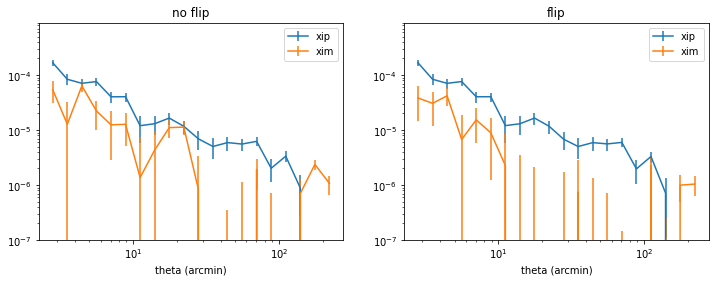

In [23]:
mplot.figure(figsize=(12,4))

mplot.subplot(121)
mplot.errorbar(theta, xip, varxi_p**0.5, label='xip')
mplot.errorbar(theta, xim, varxi_m**0.5, label='xim')
mplot.xscale('log')
mplot.yscale('log')
mplot.legend()
mplot.xlabel('theta (arcmin)')
mplot.ylim(1e-7,9e-4)
mplot.title('no flip')

mplot.subplot(122)
mplot.errorbar(theta_flip, xip_flip, varxi_p_flip**0.5, label='xip')
mplot.errorbar(theta_flip, xim_flip, varxi_m_flip**0.5, label='xim')
mplot.xscale('log')
mplot.yscale('log')
mplot.legend()
mplot.xlabel('theta (arcmin)')
mplot.ylim(1e-7,9e-4)
mplot.title('flip')


(2e-06, 0.0009)

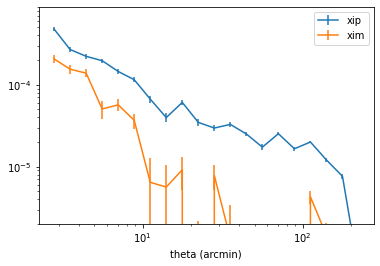

In [111]:
mplot.errorbar(theta, xip, varxi_p**0.5, label='xip')
mplot.errorbar(theta, xim, varxi_m**0.5, label='xim')
mplot.xscale('log')
mplot.yscale('log')
mplot.legend()
mplot.xlabel('theta (arcmin)')
mplot.ylim(2e-6,9e-4)

In [ ]:
ra = ra[flags]
dec = dec[mask0]
w = w[mask0]
e1 = mcal_ellip['e1'][mask0]
e2 = mcal_ellip['e2'][mask0]
zmc_0 = mcal_z['z_mc'][mask0]
psf_e1 = mcal_psf['psf_e1'][mask0]
psf_e2 = mcal_psf['psf_e2'][mask0]
psf_size = mcal_psf['psf_size'][mask0]


mean_e1 = np.mean(e1)/R11tot
mean_e2 = np.mean(e2)/R22tot